In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train (1).csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now we will  find out missing values and try to fill them

In [5]:
df.isnull().sum().loc[lambda x:x>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
df.isnull().sum().loc[lambda x:x>0]/len(df)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

As we can see some columns have more missing data.we need to remove them

In [7]:
na=df.isna().sum().loc[lambda x:x>(df.shape[0]*0.1)].index
df.drop(na,axis=1,inplace=True)

In [8]:
df.drop('Id',axis=1,inplace=True)

now we figure out missing values and try to fill them

In [9]:
df['GarageType'].fillna('other',inplace=True)

In [10]:
df['GarageFinish'].fillna('other',inplace=True)
df['GarageYrBlt'].fillna('1980.0',inplace=True)

In [11]:
df['BsmtQual'].value_counts()
#we have two values of same len.so we can fill with either of 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [12]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [13]:
df['Electrical'].fillna('SBrkr',inplace=True)
df['MasVnrArea'].fillna('0.0',inplace=True)
df['BsmtQual'].fillna('Gd',inplace=True)
df['BsmtCond'].fillna('TA',inplace=True)
df['BsmtExposure'].fillna('No',inplace=True)
df['BsmtFinType2'].fillna('Unf',inplace=True)
df['GarageQual'].fillna('TA',inplace=True)
df['GarageCond'].fillna('TA',inplace=True)

In [14]:
df['MasVnrType'].fillna('None',inplace=True)
df['BsmtFinType1'].fillna('Unf',inplace=True)

find outliars and try to remove them

In [15]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

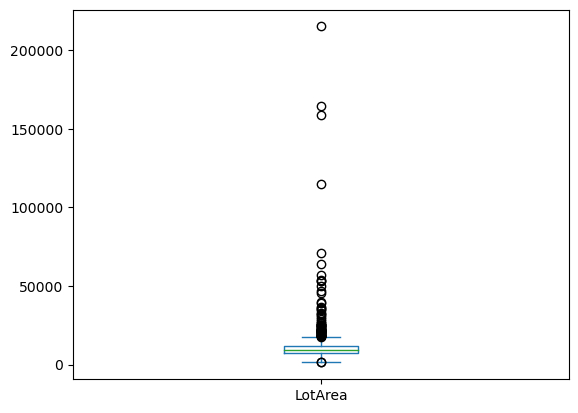

In [16]:
df['LotArea'].plot(kind='box')

In [17]:
df['LotArea'].max()

215245

In [18]:
df[df['LotArea']>100000]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,...,0,0,0,0,500,6,2007,WD,Normal,277000
313,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,190,RL,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,...,0,0,0,0,700,8,2008,WD,Normal,228950
706,20,RL,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,...,0,0,0,0,0,6,2007,WD,Normal,302000


In [19]:
s=df[df['LotArea']>100000].index

In [20]:
df.drop(s,axis=0,inplace=True)

In [21]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
df.drop('MiscVal',axis=1,inplace=True)

In [23]:
df.drop('Neighborhood',axis=1,inplace=True)

In [24]:
df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.271663,0.035269,-0.060902,0.028233,0.042913,-0.072044,-0.065114,-0.139974,-0.240061,...,-0.098875,-0.021953,-0.004925,-0.011779,-0.043899,-0.025905,0.008374,-0.015141,-0.021706,-0.083704
LotArea,-0.271663,1.000000,0.178984,-0.020832,0.042309,0.037385,0.271493,0.075013,0.039396,0.349510,...,0.301029,0.222886,0.166592,-0.005668,0.044808,0.096518,0.142554,-0.002883,-0.031130,0.354494
OverallQual,0.035269,0.178984,1.000000,-0.091319,0.572631,0.551228,0.240013,-0.061334,0.308675,0.538762,...,0.562140,0.243126,0.309105,-0.113907,0.030421,0.065007,0.065220,0.071300,-0.027454,0.792761
OverallCond,-0.060902,-0.020832,-0.091319,1.000000,-0.375955,0.073196,-0.046149,0.042291,-0.137660,-0.171495,...,-0.150952,-0.003370,-0.033372,0.070580,0.025575,0.054976,-0.001957,-0.003657,0.044610,-0.078005
YearBuilt,0.028233,0.042309,0.572631,-0.375955,1.000000,0.593682,0.251012,-0.048823,0.149001,0.393560,...,0.479250,0.227387,0.188840,-0.387587,0.031289,-0.050535,0.004909,0.012436,-0.013669,0.525587
YearRemodAdd,0.042913,0.037385,0.551228,0.073196,0.593682,1.000000,0.129981,-0.064420,0.179993,0.293304,...,0.372152,0.209728,0.225213,-0.194210,0.045337,-0.038805,0.005833,0.022002,0.037269,0.509796
BsmtFinSF1,-0.072044,0.271493,0.240013,-0.046149,0.251012,0.129981,1.000000,-0.056788,-0.494465,0.519728,...,0.296261,0.199781,0.113561,-0.101225,0.026998,0.063299,0.141218,-0.016207,0.014132,0.383087
BsmtFinSF2,-0.065114,0.075013,-0.061334,0.042291,-0.048823,-0.064420,-0.056788,1.000000,-0.207063,0.097840,...,-0.018953,0.069921,0.005917,0.038053,-0.029849,0.090513,0.042280,-0.015258,0.028722,-0.019361
BsmtUnfSF,-0.139974,0.039396,0.308675,-0.137660,0.149001,0.179993,-0.494465,-0.207063,1.000000,0.419760,...,0.184298,-0.001875,0.127937,-0.003052,0.020617,-0.012977,-0.035222,0.035289,-0.040508,0.217719
TotalBsmtSF,-0.240061,0.349510,0.538762,-0.171495,0.393560,0.293304,0.519728,0.097840,0.419760,1.000000,...,0.487177,0.231416,0.249412,-0.094404,0.037964,0.085836,0.126741,0.013194,-0.015694,0.611049


Figure out the object columns.

In [25]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
df['MasVnrArea']=pd.to_numeric(df['MasVnrArea'])

In [27]:
df['PavedDrive']=pd.factorize(df['PavedDrive'])[0]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101)

In [31]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [32]:
col=make_column_transformer((OneHotEncoder(sparse=False, handle_unknown='ignore'),['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType',
       'SaleCondition']),remainder='passthrough')

In [33]:
sc=StandardScaler()

In [37]:
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import Lasso
from  xgboost import  XGBRegressor
from sklearn.svm import SVR

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error

In [39]:
gbr=GradientBoostingRegressor(n_estimators=100)
etr=ExtraTreesRegressor(n_estimators=150)
rfr=RandomForestRegressor(n_estimators=150)
la=Lasso(alpha=5.0)
sv=SVR()

In [40]:
xgb=XGBRegressor()

In [41]:
pipe=make_pipeline(col,sc,gbr)
pipe.fit(X_train,y_train)
pre=pipe.predict(X_test)
print(r2_score(y_test,pre))

0.7395852883946709


In [42]:
pipe=make_pipeline(col,sc,etr)
pipe.fit(X_train,y_train)
pre1=pipe.predict(X_test)
print(r2_score(y_test,pre1))

0.7497684120569422


In [43]:
pipe=make_pipeline(col,sc,rfr)
pipe.fit(X_train,y_train)
pr=pipe.predict(X_test)
print(r2_score(y_test,pr))

0.7513899553621516


In [44]:
pipe=make_pipeline(col,sc,la)
pipe.fit(X_train,y_train)
p=pipe.predict(X_test)
print(r2_score(y_test,p))

0.5924232386093239


C:\Users\A\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.605e+09, tolerance: 6.212e+08
  model = cd_fast.enet_coordinate_descent(


In [45]:
pipe=make_pipeline(col,sc,xgb)
pipe.fit(X_train,y_train)
p5=pipe.predict(X_test)
print(r2_score(y_test,p5))

0.7749007506911891


In [46]:
import pickle

In [47]:
pickle.dump(xgb,open('xgbmodel.pkl','wb'))

In [48]:
pickled_model=pickle.load(open('xgbmodel.pkl','rb'))